## Comparative Analysis of NH-CRC Driver Genes from MutSig2CV and COSMIC Cancer Genes Census

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dcr = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/dcr_sig_genes.txt", sep="\t")
white_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/white_tcga_sig_genes.txt", sep="\t")
black_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/black_tcga_sig_genes.txt", sep="\t")
asian_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/asian_tcga_sig_genes.txt", sep="\t")
cosmic = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/cosmic_census.csv")

In [ ]:
# second run, actually should be okay! nice!!!
asian_2_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/mutsig_outputs/sig_genes_asian2.txt", sep="\t")
black_2_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/mutsig_outputs/sig_genes_black2.txt", sep="\t")
white_2_tcga = pd.read_csv("/content/drive/MyDrive/colab_notebooks/data/mutsig_outputs/sig_genes_white_2.txt", sep="\t")

In [ ]:
# Filter for colorectal cancer. Will compare CRC associated genes and non-CRC genes from COSMIC!
cosmic_tumor_types = cosmic.loc[:, "Tumour Types(Somatic)"]
cosmic_crc_true = cosmic_tumor_types.str.contains("colon") | cosmic_tumor_types.str.contains("colorectal")
cosmic_crc = cosmic[cosmic_crc_true]

## Subset only the significant genes: q < 0.1

In [ ]:
dcr_sig = dcr[dcr['q'] < 0.1]
white_tcga_sig = white_tcga[white_tcga['q'] < 0.1]
black_tcga_sig = black_tcga[black_tcga['q'] < 0.1]
asian_tcga_sig = asian_tcga[asian_tcga['q'] < 0.1]

In [ ]:
white_2_tcga_sig = white_2_tcga[white_tcga['q'] < 0.1]
black_2_tcga_sig = black_2_tcga[black_tcga['q'] < 0.1]
asian_2_tcga_sig = asian_2_tcga[asian_tcga['q'] < 0.1]

In [ ]:
dcr_sig.loc[dcr_sig["gene"].isin(['ZMYM2', 'FGFR1OP', 'TSC1'])].loc[:, ["rank", "gene", "longname", "q"]]

,rank,gene,longname,q
0,1,TSC1,tuberous sclerosis 1,0.001873
1,2,FGFR1OP,FGFR1 oncogene partner,0.004132
31,32,ZMYM2,"zinc finger, MYM-type 2",0.095585


In [ ]:
asian_2_tcga_sig

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,TP53,tumor protein p53,1314,63,0,0,2,2,1,1,6,5,6,1.520182e-09,1.0000,0.0720,4.239081e-09,0.000080
1,2,CCDC90B,coiled-coil domain containing 90B,797,51,0,0,2,0,0,1,3,3,3,1.072925e-05,0.0126,0.5882,2.341224e-06,0.022080
2,3,HEMGN,hemogen,1471,85,0,0,2,2,0,0,4,3,4,1.484744e-06,1.0000,0.1910,6.589543e-06,0.031442


## Overlapping genes analysis

I did initially attempt to check the synonyms in the COSMIC gene census, but they did not have any matches to the MutSig2CV sig genes in dcr, so I am not going to account for them.

In [ ]:
# Place each race's genes into a set, as well as the COSMIC census genes
dcr_set = set(dcr_sig.loc[:, "gene"])
white_set = set(white_tcga_sig.loc[:, "gene"])
black_set = set(black_tcga_sig.loc[:, "gene"])
asian_set = set(asian_tcga_sig.loc[:, "gene"])
cosmic_set = set(cosmic.loc[:, "Gene Symbol"])
cosmic_crc_set = set(cosmic_crc.loc[:, "Gene Symbol"])

In [ ]:
# Repeat for the second mutsig run
white_2_set = set(white_2_tcga_sig.loc[:, "gene"])
black_2_set = set(black_2_tcga_sig.loc[:, "gene"])
asian_2_set = set(asian_2_tcga_sig.loc[:, "gene"])

In [ ]:
# overlap with the Native Hawaiian data (most important for me)
cosmic_dcr_overlap = dcr_set.intersection(cosmic_set)
cosmic_crc_dcr_overlap = dcr_set.intersection(cosmic_crc_set)
white_dcr_overlap = dcr_set.intersection(white_set)
black_dcr_overlap = dcr_set.intersection(black_set)
asian_dcr_overlap = dcr_set.intersection(asian_set)

print(cosmic_dcr_overlap)
print(cosmic_crc_dcr_overlap)
print(white_dcr_overlap)
print(black_dcr_overlap)
print(asian_dcr_overlap)

{'ZMYM2', 'FGFR1OP', 'TSC1'}
set()
set()
set()
set()


In [ ]:
white_dcr_overlap_2 = dcr_set.intersection(white_2_set)
black_dcr_overlap_2 = dcr_set.intersection(black_2_set)
asian_dcr_overlap_2 = dcr_set.intersection(asian_2_set)

print(white_dcr_overlap_2)
print(black_dcr_overlap_2)
print(asian_dcr_overlap_2)

set()
set()
set()


Hmmm… there is absolutely no overlap of the NH-CRC driver genes with those of the tcga and those in cosmic.

In [ ]:
# overlap of tcga with cosmic. And overlap of tcga with each other

cosmic_white_overlap = cosmic_crc_set.intersection(white_set)
cosmic_black_overlap = cosmic_crc_set.intersection(black_set)
cosmic_asian_overlap = cosmic_crc_set.intersection(asian_set)

white_black_overlap = white_set.intersection(black_set)
white_asian_overlap = white_set.intersection(asian_set)
black_asian_overlap = asian_set.intersection(black_set)

print(cosmic_white_overlap)
print(cosmic_black_overlap)
print(cosmic_asian_overlap)
print(white_black_overlap)
print(white_asian_overlap)
print(black_asian_overlap)

{'BCL9L', 'FBXW7', 'CTNNB1', 'TP53', 'KRAS', 'TCF7L2', 'PIK3CA', 'TGFBR2', 'APC', 'SMAD4', 'BRAF', 'B2M', 'PIK3R1'}
{'FBXW7', 'TP53', 'KRAS', 'PIK3CA', 'APC', 'BRAF'}
{'APC', 'TP53'}
{'FAM123B', 'RNF43', 'FBXW7', 'TP53', 'ACVR2A', 'KRAS', 'LARP4B', 'PIK3CA', 'APC', 'BRAF'}
{'APC', 'TP53'}
{'APC', 'TP53'}


In [ ]:
# repeat for the second run

# overlap of tcga with cosmic. And overlap of tcga with each other

cosmic_white_overlap_2 = cosmic_crc_set.intersection(white_2_set)
cosmic_black_overlap_2 = cosmic_crc_set.intersection(black_2_set)
cosmic_asian_overlap_2 = cosmic_crc_set.intersection(asian_2_set)

white_black_overlap_2 = white_2_set.intersection(black_2_set)
white_asian_overlap_2 = white_2_set.intersection(asian_2_set)
black_asian_overlap_2 = asian_2_set.intersection(black_2_set)

print(cosmic_white_overlap_2)
print(cosmic_black_overlap_2)
print(cosmic_asian_overlap_2)
print(white_black_overlap_2)
print(white_asian_overlap_2)
print(black_asian_overlap_2)

{'SALL4', 'BCL9L', 'FBXW7', 'TP53', 'MAP2K4', 'KRAS', 'TCF7L2', 'TGFBR2', 'APC', 'SMAD4', 'BRAF', 'ROBO2'}
{'FBXW7', 'TP53', 'KRAS', 'APC', 'BRAF'}
{'TP53'}
{'SOX9', 'RNF43', 'FBXW7', 'TP53', 'ACVR2A', 'KRAS', 'LARP4B', 'APC', 'BRAF'}
{'TP53'}
{'TP53'}


In [ ]:
# Unique genes analysis
unique_dcr_genes = dcr_set.difference(cosmic_crc_set)
unique_cosmic_genes = cosmic_crc_set.difference(dcr_set)

print("Unique Genes in dcr mutsig2CV:", unique_dcr_genes)
print("Unique Genes in COSMIC:", unique_cosmic_genes)

Unique Genes in dcr mutsig2CV: {'SMC4', 'SYNE1', 'NUP62', 'LAPTM4A', 'XYLT1', 'PPP1R12A', 'CYP3A43', 'KIAA0368', 'DNAH6', 'PTK2', 'DNMBP', 'FRMD4B', 'FGFR1OP', 'CLIP4', 'C6orf10', 'SLC5A3', 'DNAH14', 'ZC3H8', 'TSC1', 'OR9I1', 'ZMYM2', 'SEPT11', 'HERC4', 'C5', 'GOLGB1', 'FAM47E', 'WDFY4', 'ESCO1', 'NPHP1', 'P2RY14', 'DIAPH3', 'ZFP37', 'ST7L', 'KIF18A', 'VAV3', 'GLG1'}
Unique Genes in COSMIC: {'BCL9L', 'SMAD3', 'TBL1XR1', 'NTRK2', 'TP53', 'USP44', 'APC', 'BAZ1A', 'BRAF', 'LEPROTL1', 'ROBO2', 'POLE', 'STAG1', 'IKZF3', 'RAD21', 'SMAD4', 'MAP2K4', 'ERBB3', 'TCF7L2', 'EIF3E', 'CUX1', 'MLH1', 'BAX', 'FAT3', 'AXIN2', 'AXIN1', 'B2M', 'ZNRF3', 'GRIN2A', 'PIK3R1', 'ARHGEF10', 'FBXW7', 'MAP2K1', 'CTNNB1', 'SMAD2', 'AKT1', 'HIF1A', 'FBLN2', 'KRAS', 'PTPRK', 'SIRPA', 'MSH2', 'MDM2', 'EP300', 'PTPRT', 'PRDM2', 'MSH6', 'SALL4', 'WDCP', 'RAD17', 'UBR5', 'USP9X', 'MAX', 'SRC', 'CNBD1', 'SFRP4', 'PIK3CA', 'TGFBR2', 'RSPO3', 'RSPO2', 'VTI1A', 'QKI', 'ARHGAP5', 'PRPF40B'}


## Jaccard Index

The Jaccard index, also known as the Jaccard similarity coefficient, is a statistic used for gauging the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.

The Jaccard Index of dcr with all sets being tested is obviously 0, since they share no driver genes with any group!

In [ ]:
def jaccard_index(set1, set2):
    """
    Calculate the Jaccard index between two sets.

    Parameters:
    set1 (set): The first set of genes.
    set2 (set): The second set of genes.

    Returns:
    float: The Jaccard index.
    """
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))

    # Handle the case when both sets are empty
    if union_size == 0:
        return 0.0

    return intersection_size / union_size

In [ ]:
# Calculate Jaccard index between each race group, including COSMIC
groups = ['NATIVE HAWAIIAN', 'COSMIC', 'WHITE', 'BLACK', 'ASIAN']
sets = [dcr_set, cosmic_crc_set, white_set, black_set, asian_set]
jaccards_dict = {}

for i in range(len(groups)):
  for j in range(i+1, len(groups)):
    jaccards_dict[groups[i] + ' & ' + groups[j]] = jaccard_index(sets[i], sets[j])

In [ ]:
jaccard_df = pd.DataFrame(jaccards_dict, index=['Jaccard Index']).transpose()
jaccard_df

,Jaccard Index
NATIVE HAWAIIAN & COSMIC,0.000000
NATIVE HAWAIIAN & WHITE,0.000000
NATIVE HAWAIIAN & BLACK,0.000000
NATIVE HAWAIIAN & ASIAN,0.000000
COSMIC & WHITE,0.057269
COSMIC & BLACK,0.085714
COSMIC & ASIAN,0.030769
WHITE & BLACK,0.056180
WHITE & ASIAN,0.011299
BLACK & ASIAN,0.153846


In [ ]:
# do it for the second, corrected mutsig run
groups = ['NATIVE HAWAIIAN', 'COSMIC', 'WHITE', 'BLACK', 'ASIAN']
sets = [dcr_set, cosmic_crc_set, white_2_set, black_2_set, asian_2_set]
jaccards_dict_2 = {}

for i in range(len(groups)):
  for j in range(i+1, len(groups)):
    jaccards_dict_2[groups[i] + ' & ' + groups[j]] = jaccard_index(sets[i], sets[j])

jaccard_df_2 = pd.DataFrame(jaccards_dict_2, index=['Jaccard Index']).transpose()
jaccard_df_2

,Jaccard Index
NATIVE HAWAIIAN & COSMIC,0.000000
NATIVE HAWAIIAN & WHITE,0.000000
NATIVE HAWAIIAN & BLACK,0.000000
NATIVE HAWAIIAN & ASIAN,0.000000
COSMIC & WHITE,0.052632
COSMIC & BLACK,0.070423
COSMIC & ASIAN,0.015152
WHITE & BLACK,0.050279
WHITE & ASIAN,0.005618
BLACK & ASIAN,0.071429


## Plotting Driver Gene Overlaps

Creating a venn diagram to illustrate the identified driver genes with q < 0.1 that were found for the Native Hawaiian CRC, TCGA, and the COSMIC cancer gene census.

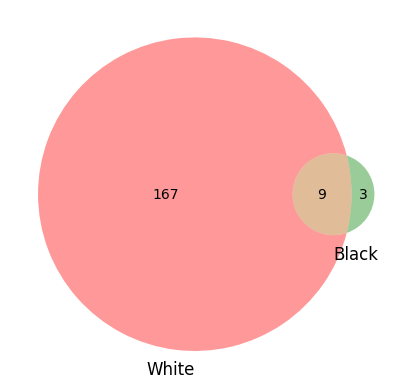

In [ ]:
from matplotlib_venn import venn2, venn3

_ = venn2([white_2_set, black_2_set], ("White", "Black"))

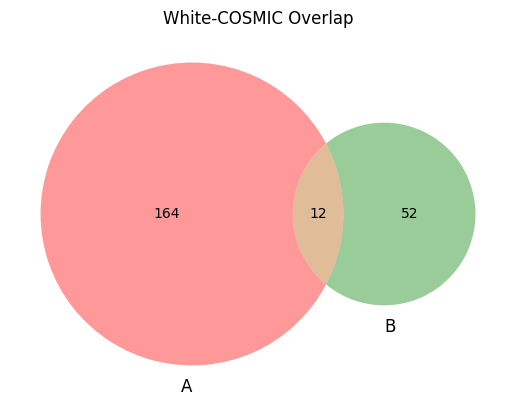

In [ ]:
venn2([white_2_set, cosmic_crc_set])
_ = plt.title("White-COSMIC Overlap")

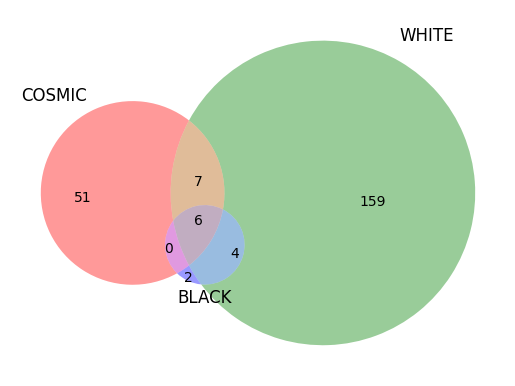

In [ ]:
venn3(subsets=[cosmic_crc_set, white_set, black_set],
      set_labels=("COSMIC", "WHITE", "BLACK"))

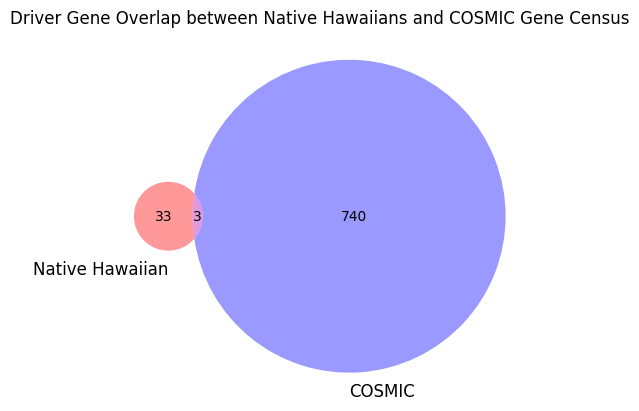

In [ ]:
venn2([dcr_set, cosmic_set],
      set_labels=("Native Hawaiian", "COSMIC"),
      set_colors=("red", "blue"))

_ = plt.title("Driver Gene Overlap between Native Hawaiians and COSMIC Gene Census")

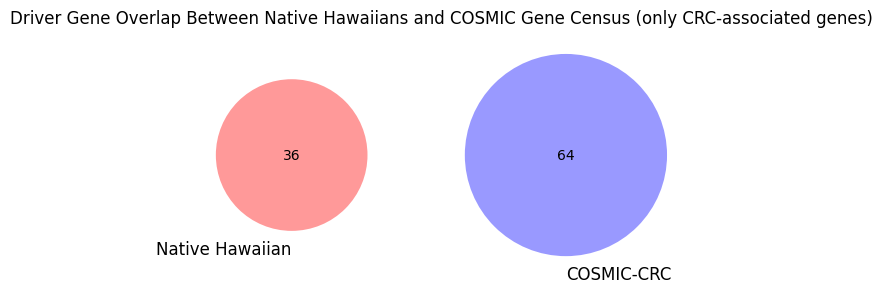

In [ ]:
venn2([dcr_set, cosmic_crc_set],
      set_labels=("Native Hawaiian", "COSMIC-CRC"),
      set_colors=("red", "blue"))

_ = plt.title("Driver Gene Overlap Between Native Hawaiians and COSMIC Gene Census (only CRC-associated genes)")

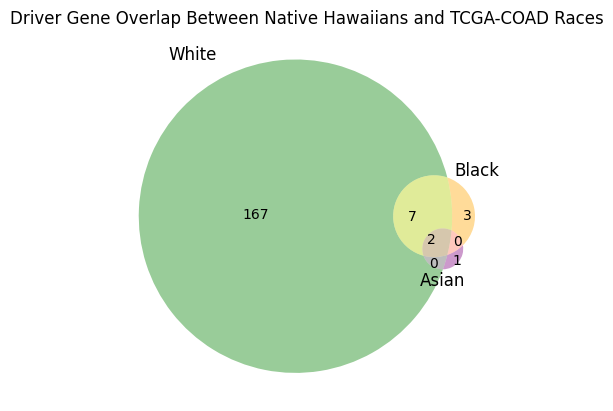

In [ ]:
venn3([white_2_set, black_2_set, asian_set],
      set_labels=("White", "Black", "Asian"),
      set_colors=("green", "orange", "purple"))

_ = plt.title("Driver Gene Overlap Between Native Hawaiians and TCGA-COAD Races")